In [23]:
data

,Weekday,Temps,LDZ,Gas_Power,Industrial
Date,,,,,
2023-01-01,0.0,8.96,486.0,74.0,141.0
2023-01-02,1.0,7.05,583.0,111.0,176.0
2023-01-03,1.0,9.91,634.0,113.0,192.0
2023-01-04,1.0,10.17,581.0,76.0,187.0
2023-01-05,1.0,9.28,572.0,114.0,195.0
...,...,...,...,...,...
2023-07-27,1.0,19.69,189.0,142.0,177.0
2023-07-28,1.0,19.53,172.0,147.0,173.0
2023-07-29,0.0,18.32,153.0,93.0,142.0


In [24]:
# #Feature Scaling
# X_sc = MinMaxScaler()
# y_sc = MinMaxScaler()

# X_train = X_sc.fit_transform(X_train.values)
# y_train = y_sc.fit_transform(y_train.values.reshape(-1,1))

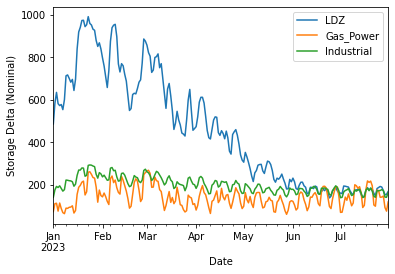

In [25]:
from matplotlib import pyplot as plt 

data.LDZ.plot()
data.Gas_Power.plot()
data.Industrial.plot()
plt.ylabel('Storage Delta (Nominal)')
plt.legend()
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# load data
data = pd.read_csv("C:/Users/kjones/Downloads/European Demand Forecast Inputs.csv", index_col = 0, header = 0)
display(data)
data1 = pd.concat([data.iloc[1:,0],data.iloc[:,1:].pct_change(periods =1).dropna()], axis = 1)

#Convert the index to datetime
data.index = pd.to_datetime(data.index)
data.sort_index(ascending = True, inplace = True)

# drop missing values
data.dropna(inplace=True)
display(data)

x = data[['Weekday', 'Temps']] 
# x.values = MinMaxScaler((x.values.min(), x.values.max()))

# Split the data
split_index = int(len(x) * 0.85)
x_train = x[:split_index]
x_test = x[split_index:]

y1 = data['LDZ']  
y2 = data['Gas_Power']
y3 = data['Industrial']

# Create test data for each output and call the function for each output
y1_train, y1_test = y1[:split_index], y1[split_index:]
y2_train, y2_test = y2[:split_index], y2[split_index:]
y3_train, y3_test = y3[:split_index], y3[split_index:]

tss = TimeSeriesSplit(n_splits = 10)

#Feature Scaling
x_scale = MinMaxScaler() 
y1_scale = MinMaxScaler() 
y2_scale = MinMaxScaler()
y3_scale = MinMaxScaler()

x_transform_train = x_scale.fit_transform(x_train.values) 
y1_transform_train = y1_scale.fit_transform(y1_train.values.reshape(-1,1))
y2_transform_train = y2_scale.fit_transform(y2_train.values.reshape(-1,1))
y3_transform_train = y3_scale.fit_transform(y3_train.values.reshape(-1,1))

,Weekday,Temps,LDZ,Gas_Power,Industrial
Date,,,,,
1/1/2023,0.0,8.96,486.0,74.0,141.0
1/2/2023,1.0,7.05,583.0,111.0,176.0
1/3/2023,1.0,9.91,634.0,113.0,192.0
1/4/2023,1.0,10.17,581.0,76.0,187.0
1/5/2023,1.0,9.28,572.0,114.0,195.0
...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN


,Weekday,Temps,LDZ,Gas_Power,Industrial
Date,,,,,
2023-01-01,0.0,8.96,486.0,74.0,141.0
2023-01-02,1.0,7.05,583.0,111.0,176.0
2023-01-03,1.0,9.91,634.0,113.0,192.0
2023-01-04,1.0,10.17,581.0,76.0,187.0
2023-01-05,1.0,9.28,572.0,114.0,195.0
...,...,...,...,...,...
2023-07-27,1.0,19.69,189.0,142.0,177.0
2023-07-28,1.0,19.53,172.0,147.0,173.0
2023-07-29,0.0,18.32,153.0,93.0,142.0


In [27]:
# adf_test(data.Temps)

In [28]:
# pd.concat([data.iloc[1:,0],data.iloc[:,1:].pct_change(periods =1).dropna()], axis = 1)

In [29]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + color.YELLOW + color.UNDERLINE + 'Test' + color.END)

Test


In [30]:
def get_polynomial(X_train,y_train,X_test,y_test,target):
    pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())
    params = {'polynomialfeatures__degree': list(range(1, 4))}
    mse = make_scorer(mean_squared_error, greater_is_better=True)
    search = GridSearchCV(pipeline, params, cv=tss, scoring=mse)

    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    print(f'{color.BOLD}{color.YELLOW}{color.UNDERLINE}{target} ML Results:{color.END} ')
    print('\t', 'Best degree:', search.best_params_['polynomialfeatures__degree'], '\n')
    
    print('\t', 'Coefficients:', best_model.named_steps['linearregression'].coef_, '\n')
    print('\t', 'Intercept:', best_model.named_steps['linearregression'].intercept_)
    
    poly_degree = search.best_params_['polynomialfeatures__degree']
    poly_features = PolynomialFeatures(degree=poly_degree, include_bias=True)
    poly_features.fit(X_train)
    feature_names = poly_features.get_feature_names_out(X_train.columns)

    formula = "y = " 
    coefficients = best_model.named_steps['linearregression'].coef_
    for i, name in enumerate(feature_names):
        formula += f"{coefficients[i]}*{name} + "
    formula += f"{best_model.named_steps['linearregression'].intercept_}"
    
    print(f'Best fitted polynomial: {formula}','\n')
    
    # Predict on the test data and calculate R-squared
    y_test_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_test_pred)
    print(f'R-squared on the test data: {r2}')
    
    results = pd.DataFrame({
        'Actual': y_test,
        'Predicted' : y_test_pred,
        'Variance' : y_test - y_test_pred
    }, index = y_test.index)#[split_index:])
    display(results)
    
    df = results.copy()
    plt.plot(df.iloc[:,0], label = 'Target')
    plt.plot(df.iloc[:,1], label = "Prediction")
    plt.bar(df.index, df.iloc[:,2], label = 'Error', color = 'gray')
    plt.axhline(linestyle = '--', color = 'red')
    plt.xticks(rotation = 45)
    plt.legend()
    plt.show()
    print('\n')
    
    return best_model 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

In [31]:
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
        adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")

## LDZ

LDZ ML Results: 
	 Best degree: 3 

	 Coefficients: [  0.          34.25793161 -22.62826292  34.25793161  -2.83743077
  -3.29528465  34.25793161  -2.83743077   0.08680596   0.13019545] 

	 Intercept: 873.6626054012806
Best fitted polynomial: y = 0.0*1 + 34.25793160543214*Weekday + -22.62826291534146*Temps + 34.2579316054301*Weekday^2 + -2.837430765895827*Weekday Temps + -3.295284650403926*Temps^2 + 34.25793160543013*Weekday^3 + -2.837430765895575*Weekday^2 Temps + 0.08680596137355101*Weekday Temps^2 + 0.1301954514094561*Temps^3 + 873.6626054012806 

R-squared on the test data: -0.43880318071234314


,Actual,Predicted,Variance
Date,,,
2023-06-30,161.0,181.312038,-20.312038
2023-07-01,161.0,159.956468,1.043532
2023-07-02,158.0,165.165330,-7.165330
2023-07-03,194.0,196.722477,-2.722477
2023-07-04,193.0,209.916971,-16.916971
2023-07-05,191.0,186.218630,4.781370
2023-07-06,189.0,176.452754,12.547246
2023-07-07,171.0,227.636470,-56.636470
2023-07-08,160.0,184.880811,-24.880811


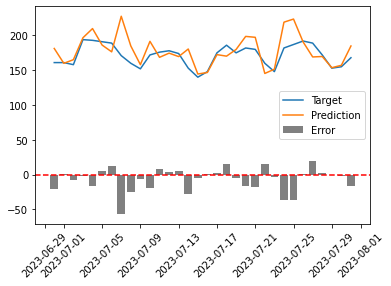

In [32]:
ldz_reg = get_polynomial(x_train, y1_train, x_test, y1_test, 'LDZ')

In [33]:
import numpy as np
from scipy.interpolate import NearestNDInterpolator as ndi
import matplotlib.pyplot as plt
 
# Dataset
# x=np.array([1, 2, 3, 4, 5, 6, 7, 8])
# y=np.array([20, 30, 5, 12, 39, 48, 50, 3])
 
nearest_model = ndi(x_train.values, y1_train.values, rescale = True)#, kind = "cubic")
 
# Plotting the Graph
# X_=np.linspace(x.min(), x.max(), 500)
model=cubic_interpolation_model(x_test.values)
 
plt.plot(x_test, model)
plt.title("Plot Smooth Curve Using the scipy.interpolate.interp1d Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

NameError: name 'cubic_interpolation_model' is not defined

In [34]:
x_test.values

array([[ 1.  , 18.34],
       [ 0.  , 17.87],
       [ 0.  , 17.56],
       [ 1.  , 17.48],
       [ 1.  , 16.91],
       [ 1.  , 18.03],
       [ 1.  , 21.33],
       [ 1.  , 23.46],
       [ 0.  , 22.7 ],
       [ 0.  , 21.51],
       [ 1.  , 22.21],
       [ 1.  , 20.13],
       [ 1.  , 18.88],
       [ 1.  , 19.56],
       [ 1.  , 21.62],
       [ 0.  , 19.59],
       [ 0.  , 19.06],
       [ 1.  , 19.11],
       [ 1.  , 19.43],
       [ 1.  , 18.44],
       [ 1.  , 17.39],
       [ 1.  , 17.45],
       [ 0.  , 19.32],
       [ 0.  , 18.51],
       [ 1.  , 16.56],
       [ 1.  , 16.4 ],
       [ 1.  , 17.78],
       [ 1.  , 19.69],
       [ 1.  , 19.53],
       [ 0.  , 18.32],
       [ 0.  , 18.06],
       [ 1.  , 18.11]])

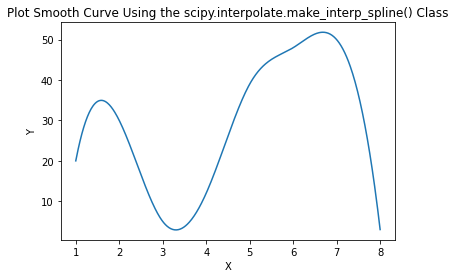

In [35]:
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
 
# Dataset
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([20, 30, 5, 12, 39, 48, 50, 3])
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using Spline Interpolation")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

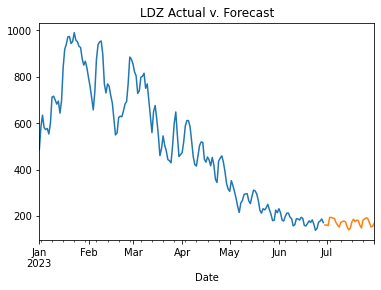

In [36]:
#Plot the target split
y1_train.groupby(y1_train.index).mean().plot()
y1_test.groupby(y1_test.index).mean().plot(title = 'LDZ Actual v. Forecast')
plt.show()

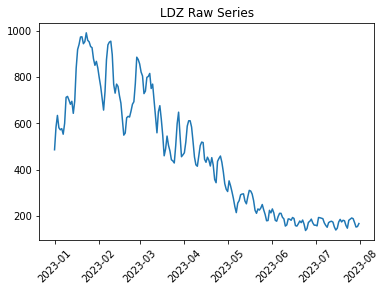

In [37]:
plt.plot(data.LDZ)
plt.xticks(rotation = 45)
plt.title('LDZ Raw Series')
plt.show()

In [38]:
adf_test(data.LDZ)

Test Statistic           -0.607348
p-value                   0.869313
# Lags                   15.000000
# Observations          196.000000
Critical Value (1%)      -3.464161
Critical Value (5%)      -2.876402
Critical Value (10%)     -2.574692
dtype: float64
 Series is Non-Stationary


In [39]:
adf_test(data.LDZ.diff(periods=1).dropna())

Test Statistic         -5.671043e+00
p-value                 8.920922e-07
# Lags                  1.400000e+01
# Observations          1.960000e+02
Critical Value (1%)    -3.464161e+00
Critical Value (5%)    -2.876402e+00
Critical Value (10%)   -2.574692e+00
dtype: float64
 Series is Stationary


LDZ ML Results: 
	 Best degree: 3 

	 Coefficients: [ 0.         25.44699977 -9.4163576   3.77532322  3.77305171  0.08828965
 25.44699977  4.83347021 -1.38398816  0.42117144] 

	 Intercept: -2.290198238374193
Best fitted polynomial: y = 0.0*1 + 25.44699976872881*Weekday + -9.416357595047018*Temps + 3.7753232237009176*Weekday^2 + 3.7730517132693944*Weekday Temps + 0.08828964813807438*Temps^2 + 25.446999768728833*Weekday^3 + 4.833470213080213*Weekday^2 Temps + -1.383988158227865*Weekday Temps^2 + 0.42117144310874366*Temps^3 + -2.290198238374193 

R-squared on the test data: -0.7132260854798624


,Actual,Predicted,Variance
Date,,,
2023-07-01,0.0,-45.200084,45.200084
2023-07-02,-3.0,0.624810,-3.624810
2023-07-03,36.0,52.435403,-16.435403
2023-07-04,-1.0,3.027813,-4.027813
2023-07-05,-2.0,-12.134053,10.134053
2023-07-06,-2.0,-17.267066,15.267066
2023-07-07,-18.0,-17.876448,-0.123552
2023-07-08,-11.0,-42.392857,31.392857
2023-07-09,-8.0,8.330553,-16.330553


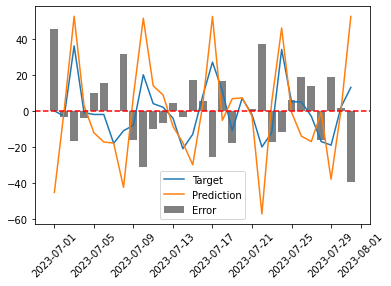

In [40]:
stationary_ldz_reg = get_polynomial(x_train.diff(periods=1).dropna(), y1_train.diff(periods=1).dropna(), x_test.diff(periods=1).dropna(), y1_test.diff(periods=1).dropna(), 'LDZ')

## GTP

GTP ML Results: 
	 Best degree: 3 

	 Coefficients: [ 0.00000000e+00  3.29736630e+01 -8.32216665e+00  3.29736630e+01
 -4.91932468e+00  1.81715239e-01  3.29736630e+01 -4.91932468e+00
  4.08023884e-01  3.06556864e-03] 

	 Intercept: 159.08419088867996
Best fitted polynomial: y = 0.0*1 + 32.9736629501542*Weekday + -8.322166649156154*Temps + 32.973662950153624*Weekday^2 + -4.919324675697484*Weekday Temps + 0.18171523876688722*Temps^2 + 32.97366295015372*Weekday^3 + -4.919324675697232*Weekday^2 Temps + 0.4080238842094648*Weekday Temps^2 + 0.003065568638852767*Temps^3 + 159.08419088867996 

R-squared on the test data: 0.4122909257228551


,Actual,Predicted,Variance
Date,,,
2023-06-30,144.0,142.208633,1.791367
2023-07-01,70.0,85.889276,-15.889276
2023-07-02,71.0,85.578594,-14.578594
2023-07-03,105.0,137.122407,-32.122407
2023-07-04,142.0,134.363759,7.636241
2023-07-05,127.0,140.246529,-13.246529
2023-07-06,157.0,168.697704,-11.697704
2023-07-07,129.0,196.109858,-67.109858
2023-07-08,101.0,99.665264,1.334736


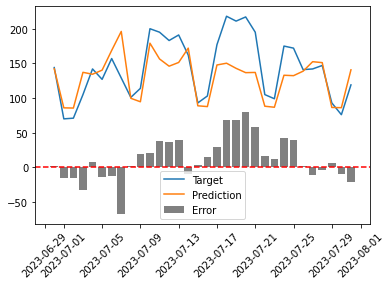

In [41]:
gtp_reg = get_polynomial(x_train, y2_train, x_test, y2_test, 'GTP')

#### Attempt to utilize an optimization fit algorithm via scipy instead of polynomial features via sklearn then compare analysis of variances. 

In [49]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

def fit_the_curve(X_train, X_test, y_train, y_test, feature_names):
    global mses
    # Iterate through polynomial degrees and alphas
    best_degree = None
    best_alpha = None
    mses = []
    best_mse = float('inf')
    
    # Define a range of alpha values for Ridge Regression (regularization parameter)
    alphas = [0.01, 0.1, 1, 10, 100]  # Add more values as needed
    
    for degree in range(1, 6):  # Try degrees from 1 to 5
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Perform grid search over alpha values
        param_grid = {'alpha': alphas}
        ridge = Ridge()
        grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_poly, y_train)

        alpha = grid_search.best_params_['alpha']
        model = Ridge(alpha=alpha)
        fitted = model.fit(X_train_poly, y_train)

        y_pred = model.predict(X_test_poly)
        mse = mean_squared_error(y_test, y_pred)
        mses.append(mse)
        if mse < best_mse:
            best_mse = mse
            best_degree = degree
            best_alpha = alpha

    print(f"Best polynomial degree: {best_degree}")
    print(f"Best alpha: {best_alpha:.2f}")
    print(f"Mean Squared Error: {best_mse:.2f}")

    # Get the coefficients of the final model
    final_coefficients = fitted.coef_

    # Create a string representation of the polynomial equation with feature names
    polynomial_equation = f"y = {final_coefficients[0]:.2f}"
    
# ...
    for i in range(best_degree + 1):
        for j, feature_name in enumerate(feature_names):
            if final_coefficients[i] != 0:
                if i == 0:
                    polynomial_equation += f" + {final_coefficients[i]:.2f}"
                else:
                    polynomial_equation += f" + {final_coefficients[i]:.2f} * {feature_name}^{i}"
# ...


    print(f"Final Regression Polynomial (Degree {best_degree}):\n{polynomial_equation}")
    
    return fitted, y_pred

# Example usage:
# feature_names = ['weekdays', 'temps']
# fitted_model, y_predictions = fit_the_curve(X_train, X_test, y_train, y_test, feature_names)


In [50]:
feature_names = ['Weekday', 'Temps']
fit, pred = fit_the_curve(x_train,x_test,y1_train,y1_test, feature_names)

Best polynomial degree: 3
Best alpha: 100.00
Mean Squared Error: 639.95
Final Regression Polynomial (Degree 3):
y = 0.00 + 2.95 * Weekday^1 + 2.95 * Temps^1 + -5.89 * Weekday^2 + -5.89 * Temps^2 + 2.95 * Weekday^3 + 2.95 * Temps^3


C:\Users\kjones\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.53348e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\kjones\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.53413e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\kjones\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.48386e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\kjones\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.36898e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [51]:
feature_names = ['Weekday', 'Temps']
fit, pred = fit_the_curve(x_train,x_test,y2_train,y2_test,feature_names)

Best polynomial degree: 4
Best alpha: 100.00
Mean Squared Error: 956.90
Final Regression Polynomial (Degree 4):
y = 0.00 + 9.42 * Weekday^1 + 9.42 * Temps^1 + 13.10 * Weekday^2 + 13.10 * Temps^2 + 9.42 * Weekday^3 + 9.42 * Temps^3 + 7.10 * Weekday^4 + 7.10 * Temps^4


C:\Users\kjones\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.53348e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\kjones\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.53413e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\kjones\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.48386e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\kjones\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.36898e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\kjones\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.

In [52]:
feature_names = ['Weekday', 'Temps']
fit, pred = fit_the_curve(x_train,x_test,y3_train,y3_test,feature_names)

Best polynomial degree: 2
Best alpha: 1.00
Mean Squared Error: 89.05
Final Regression Polynomial (Degree 2):
y = 0.00 + 3.82 * Weekday^1 + 3.82 * Temps^1 + -2.82 * Weekday^2 + -2.82 * Temps^2


C:\Users\kjones\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.53348e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\kjones\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.53413e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\kjones\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.48386e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\kjones\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.36898e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [28]:
fit, pred = fit_the_curve(x_train,x_test,y1_train,y1_test)

Best polynomial degree: 3
Best alpha: 0.10
Mean Squared Error: 329.39


In [30]:
fit, pred = fit_the_curve(x_train,x_test,y2_train,y2_test)

Best polynomial degree: 4
Best alpha: 0.10
Mean Squared Error: 932.18


In [32]:
fit, pred = fit_the_curve(x_train,x_test,y3_train,y3_test)

Best polynomial degree: 2
Best alpha: 0.10
Mean Squared Error: 89.52


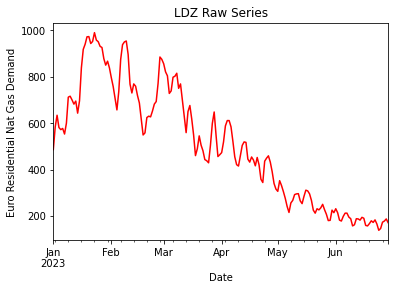

Test Statistic           -0.800969
p-value                   0.818837
# Lags                    8.000000
# Observations          171.000000
Critical Value (1%)      -3.469181
Critical Value (5%)      -2.878595
Critical Value (10%)     -2.575863
dtype: float64
 Series is Non-Stationary


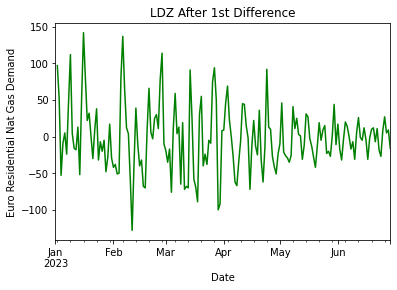

Test Statistic           -5.252205
p-value                   0.000007
# Lags                   14.000000
# Observations          164.000000
Critical Value (1%)      -3.470866
Critical Value (5%)      -2.879330
Critical Value (10%)     -2.576255
dtype: float64
 Series is Stationary


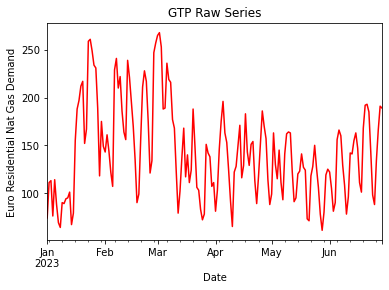

Test Statistic           -2.796152
p-value                   0.058826
# Lags                   14.000000
# Observations          165.000000
Critical Value (1%)      -3.470616
Critical Value (5%)      -2.879221
Critical Value (10%)     -2.576197
dtype: float64
 Series is Non-Stationary


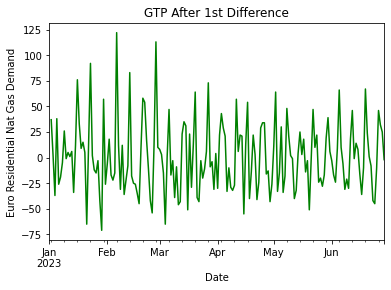

Test Statistic           -4.306343
p-value                   0.000433
# Lags                   13.000000
# Observations          165.000000
Critical Value (1%)      -3.470616
Critical Value (5%)      -2.879221
Critical Value (10%)     -2.576197
dtype: float64
 Series is Stationary


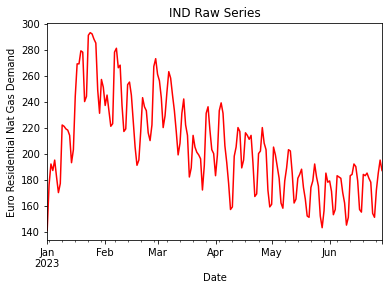

Test Statistic           -1.489633
p-value                   0.538633
# Lags                   14.000000
# Observations          165.000000
Critical Value (1%)      -3.470616
Critical Value (5%)      -2.879221
Critical Value (10%)     -2.576197
dtype: float64
 Series is Non-Stationary


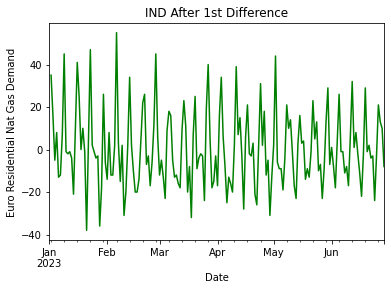

Test Statistic           -3.474851
p-value                   0.008657
# Lags                   13.000000
# Observations          165.000000
Critical Value (1%)      -3.470616
Critical Value (5%)      -2.879221
Critical Value (10%)     -2.576197
dtype: float64
 Series is Stationary


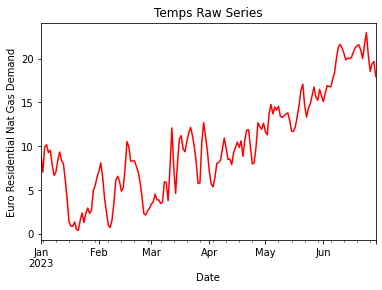

Test Statistic           -0.655105
p-value                   0.858038
# Lags                    5.000000
# Observations          174.000000
Critical Value (1%)      -3.468502
Critical Value (5%)      -2.878298
Critical Value (10%)     -2.575704
dtype: float64
 Series is Non-Stationary


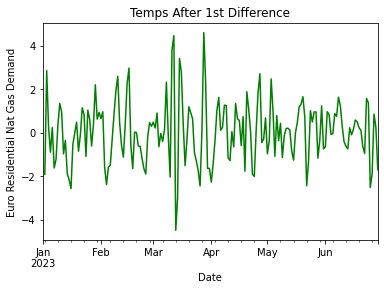

Test Statistic         -7.651140e+00
p-value                 1.788023e-11
# Lags                  4.000000e+00
# Observations          1.740000e+02
Critical Value (1%)    -3.468502e+00
Critical Value (5%)    -2.878298e+00
Critical Value (10%)   -2.575704e+00
dtype: float64
 Series is Stationary


In [75]:
from matplotlib import pyplot as plt 


def eda_plot(df, title):
    df.plot(ylabel = 'Euro Residential Nat Gas Demand', color = 'red', title = f'{title} Raw Series')
    plt.show()
    adf_test(df)

    df.diff().plot(ylabel = 'Euro Residential Nat Gas Demand', color = 'green', title = f'{title} After 1st Difference')
    # plt.ylabel('Euro Residential Nat Gas Demand')
    plt.show()
    adf_test(df.diff().dropna())
    
eda_plot(y1_train, 'LDZ')
eda_plot(y2_train, "GTP")
eda_plot(y3_train, 'IND')
eda_plot(x_train.Temps, 'Temps')

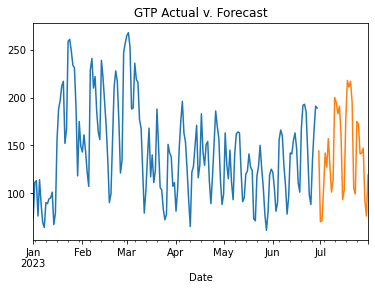

In [42]:
#Plot the target split
y2_train.groupby(y2_train.index).mean().plot()
y2_test.groupby(y2_test.index).mean().plot(title = 'GTP Actual v. Forecast')
plt.show()

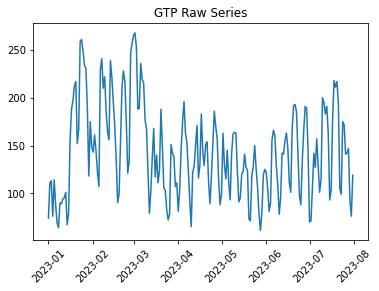

In [43]:
plt.plot(data.Gas_Power)
plt.xticks(rotation = 45)
plt.title('GTP Raw Series')
plt.show()

In [44]:
adf_test(data.Gas_Power)

Test Statistic           -3.271905
p-value                   0.016182
# Lags                   14.000000
# Observations          197.000000
Critical Value (1%)      -3.463987
Critical Value (5%)      -2.876326
Critical Value (10%)     -2.574652
dtype: float64
 Series is Stationary


## IND

IND ML Results: 
	 Best degree: 3 

	 Coefficients: [ 0.00000000e+00  1.49161980e+01 -7.30077591e+00  1.49161980e+01
 -1.25346056e+00 -2.29252293e-02  1.49161980e+01 -1.25346056e+00
  8.71672700e-02  7.49369048e-03] 

	 Intercept: 245.52393005675216
Best fitted polynomial: y = 0.0*1 + 14.916197954885098*Weekday + -7.30077591279872*Temps + 14.916197954884472*Weekday^2 + -1.2534605639278058*Weekday Temps + -0.02292522930838692*Temps^2 + 14.916197954884495*Weekday^3 + -1.253460563927694*Weekday^2 Temps + 0.08716726999169166*Weekday Temps^2 + 0.007493690477852866*Temps^3 + 245.52393005675216 

R-squared on the test data: 0.5520952744057368


,Actual,Predicted,Variance
Date,,,
2023-06-30,170.0,178.234321,-8.234321
2023-07-01,139.0,150.501315,-11.501315
2023-07-02,141.0,150.829233,-9.829233
2023-07-03,166.0,178.487119,-12.487119
2023-07-04,173.0,179.029115,-6.029115
2023-07-05,176.0,178.245690,-2.245690
2023-07-06,182.0,183.024896,-1.024896
2023-07-07,164.0,192.297362,-28.297362
2023-07-08,149.0,155.637495,-6.637495


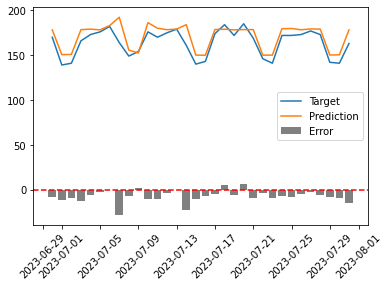

In [45]:
ind_reg = get_polynomial(x_train, y3_train, x_test, y3_test, 'IND')

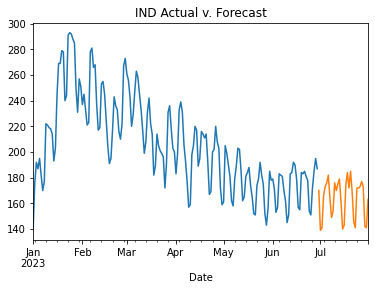

In [46]:
#Plot the target split
y3_train.groupby(y3_train.index).mean().plot()
y3_test.groupby(y3_test.index).mean().plot(title = 'IND Actual v. Forecast')
plt.show()

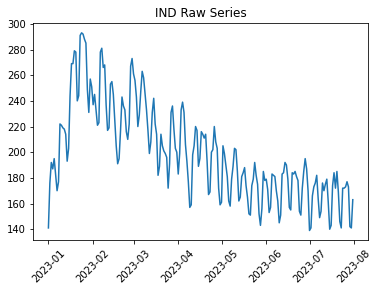

In [47]:
plt.plot(data.Industrial)
plt.xticks(rotation = 45)
plt.title('IND Raw Series')
plt.show()

In [48]:
adf_test(data.Industrial)

Test Statistic           -1.395413
p-value                   0.584473
# Lags                   14.000000
# Observations          197.000000
Critical Value (1%)      -3.463987
Critical Value (5%)      -2.876326
Critical Value (10%)     -2.574652
dtype: float64
 Series is Non-Stationary


In [49]:
adf_test(data.Industrial.diff(periods=1).dropna())

Test Statistic           -3.836812
p-value                   0.002552
# Lags                   13.000000
# Observations          197.000000
Critical Value (1%)      -3.463987
Critical Value (5%)      -2.876326
Critical Value (10%)     -2.574652
dtype: float64
 Series is Stationary
